# My First Convolutional Neural Network : CIFAR-10
---
#### 실습목표
1. CNN의 기본 아이디어를 안다.
2. CNN의 구조를 그리고, 코드로 옮길 수 있다.

### Keras Upgrade

In [ ]:
!pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 10.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.1.1 which is incompatible.


In [ ]:
import os

os.environ['KERAS_BACKEND'] = 'tensorflow'

## Real Game : CNN on CIFAR-10

여기에서는 여러분이 직접 코드를 완성해야 하는 문제가 곳곳에 있습니다!

In [ ]:
'''
라이브러리들을 불러오자.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd
from sklearn.metrics import accuracy_score

import keras

### Data Loading

In [ ]:
(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data()

In [ ]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [ ]:
labels = {0 : 'Airplane',
          1 : 'Automobile',
          2 : 'Bird',
          3 : 'Cat',
          4 : 'Deer',
          5 : 'Dog',
          6 : 'Frog',
          7 : 'Horse',
          8 : 'Ship',
          9 : 'Truck' }

print(labels)

{0: 'Airplane', 1: 'Automobile', 2: 'Bird', 3: 'Cat', 4: 'Deer', 5: 'Dog', 6: 'Frog', 7: 'Horse', 8: 'Ship', 9: 'Truck'}


id = 700
다음 그림은 Horse 입니다.


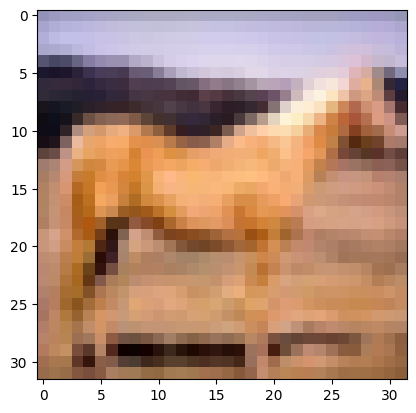

In [ ]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id][0]]} 입니다.')
plt.imshow(test_x[id])
plt.show()

### X : 표준화 Scaling (standardization)

$$ X_{scaled} = {{x_{original} - mean(x)}\over{std(x)} } $$

* Choose 1. 한꺼번에 Standardization 적용

In [ ]:
mean_n, std_n = train_x.mean(), train_x.std()

In [ ]:
train_x_ss1 = (train_x - mean_n) / std_n
test_x_ss1 = (test_x - mean_n) / std_n

In [ ]:
train_x_ss1.mean(), train_x_ss1.std()

(-2.5247951877342226e-17, 1.0000000000000022)

* Choose 2. 채널별로 Standardization 적용

In [ ]:
tr_r_mean, tr_r_std = train_x[:,:,:,0].mean(), train_x[:,:,:,0].std()
tr_g_mean, tr_g_std = train_x[:,:,:,1].mean(), train_x[:,:,:,1].std()
tr_b_mean, tr_b_std = train_x[:,:,:,2].mean(), train_x[:,:,:,2].std()

In [ ]:
train_x_r = (train_x[:,:,:,0] - tr_r_mean) / tr_r_std
train_x_g = (train_x[:,:,:,1] - tr_g_mean) / tr_g_std
train_x_b = (train_x[:,:,:,2] - tr_b_mean) / tr_b_std

In [ ]:
train_x_ss2 = np.stack((train_x_r, train_x_g, train_x_b), axis=3)

In [ ]:
test_x_r = (test_x[:,:,:,0] - tr_r_mean) / tr_r_std
test_x_g = (test_x[:,:,:,1] - tr_g_mean) / tr_g_std
test_x_b = (test_x[:,:,:,2] - tr_b_mean) / tr_b_std

In [ ]:
test_x_ss2 = np.stack((test_x_r, test_x_g, test_x_b), axis=3)

In [ ]:
train_x_ss1.shape, train_x_ss2.shape

((50000, 32, 32, 3), (50000, 32, 32, 3))

### Y : One-Hot Encoding

In [ ]:
from keras.utils import to_categorical

class_n = len(np.unique(train_y))

train_y = to_categorical(train_y, class_n)
test_y = to_categorical(test_y, class_n)

In [ ]:
train_y.shape, train_x.shape

((50000, 10), (50000, 32, 32, 3))

### 코드를 완성해주세요!

- 조건
    - **model.fit( ) 을 history 에 담아서 학습 과정의 로그를 남길 것.**
    - EarlyStopping 의 옵션도 조절해보자.
---

- **자유롭게 먼저 해보는 것을 추천**

---

- **구조를 따라서 코딩을 한다면**
    0. Functional, Sequential 중 택일
    1. 인풋레이어
    2. Convolution : 필터수 32개, 사이즈(3, 3), same padding
    3. Convolution : 필터수 32개, 사이즈(3, 3), same padding
    4. BatchNormalization
    5. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
    6. DropOut : 25% 비활성화
    7. Convolution : 필터수 64개, 사이즈(3, 3), same padding
    8. Convolution : 필터수 64개, 사이즈(3, 3), same padding
    9. BatchNormalization
    10. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
    11. DropOut : 25% 비활성화
    12. Flatten( )
    13. Fully Connected Layer : 노드 1024개
    14. BatchNormalization
    15. DropOut : 35% 비활성화
    16. 아웃풋레이어



In [ ]:
import keras

from keras.utils import clear_session
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Flatten, BatchNormalization, Dropout
from keras.layers import Conv2D, MaxPool2D

#### Sequential API

In [ ]:
## 1. 세션 클리어
clear_session()

## 2. 모델 선언
model = Sequential()

## 3. 레이어 블록 조립
# 인풋레이어
model.add( Input(shape=(32,32,3)) )
# Convolution : 필터수 32개, 사이즈(3, 3), same padding
model.add( Conv2D(filters=32,         # 새롭게 제작하려는 feature map의 수
                  kernel_size=(3,3),  # Conv2D filter의 가로세로 사이즈 (depth는 케라스가 자동 보정)
                  strides=(1,1),      # Conv2D filter의 이동 보폭
                  padding='same',     # 1.feature map 사이즈 유지 | 2.외곽 정보 더 반영
                  activation='relu'   # 주의
                  ) )
# Convolution : 필터수 32개, 사이즈(3, 3), same padding
model.add( Conv2D(filters=32,         # 새롭게 제작하려는 feature map의 수
                  kernel_size=(3,3),  # Conv2D filter의 가로세로 사이즈 (depth는 케라스가 자동 보정)
                  strides=(1,1),      # Conv2D filter의 이동 보폭
                  padding='same',     # 1.feature map 사이즈 유지 | 2.외곽 정보 더 반영
                  activation='relu'   # 주의
                  ) )
# BatchNormalization
model.add( BatchNormalization() )
# MaxPooling : 사이즈(2,2) 스트라이드(2,2)
model.add( MaxPool2D(pool_size=(2,2), # pooling filter의 가로세로 사이즈
                     strides=(2,2)    # pooling filter의 이동 보폭
                     ) )
# DropOut : 25% 비활성화
model.add( Dropout(0.25) )
# Convolution : 필터수 64개, 사이즈(3, 3), same padding
model.add( Conv2D(filters=64,         # 새롭게 제작하려는 feature map의 수
                  kernel_size=(3,3),  # Conv2D filter의 가로세로 사이즈 (depth는 케라스가 자동 보정)
                  strides=(1,1),      # Conv2D filter의 이동 보폭
                  padding='same',     # 1.feature map 사이즈 유지 | 2.외곽 정보 더 반영
                  activation='relu'   # 주의
                  ) )
# Convolution : 필터수 64개, 사이즈(3, 3), same padding
model.add( Conv2D(filters=64,         # 새롭게 제작하려는 feature map의 수
                  kernel_size=(3,3),  # Conv2D filter의 가로세로 사이즈 (depth는 케라스가 자동 보정)
                  strides=(1,1),      # Conv2D filter의 이동 보폭
                  padding='same',     # 1.feature map 사이즈 유지 | 2.외곽 정보 더 반영
                  activation='relu'   # 주의
                  ) )
# BatchNormalization
model.add( BatchNormalization() )
# MaxPooling : 사이즈(2,2) 스트라이드(2,2)
model.add( MaxPool2D(pool_size=(2,2), # pooling filter의 가로세로 사이즈
                     strides=(2,2)    # pooling filter의 이동 보폭
                     ) )
# DropOut : 25% 비활성화
model.add( Dropout(0.25) )
# Flatten( )
model.add( Flatten() )
# Fully Connected Layer : 노드 1024개
model.add( Dense(1024, activation='relu') )
# BatchNormalization
model.add( BatchNormalization() )
# DropOut : 35% 비활성화
model.add( Dropout(0.35) )
# 아웃풋레이어
model.add( Dense(10, activation='softmax') )

## 4. 컴파일
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       4,195,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,275,626 (16.31 MB)

 Trainable params: 4,273,386 (16.30 MB)

 Non-trainable params: 2,240 (8.75 KB)

#### Functional API

In [ ]:
## 1. 세션 클리어

## 2. 레이어 엮기
# 인풋레이어
il = Input(shape=(32,32,3))
# Convolution : 필터수 32개, 사이즈(3, 3), same padding
hl = Conv2D(32, (3,3), (1,1), 'same', activation='relu')(il)
# Convolution : 필터수 32개, 사이즈(3, 3), same padding
hl = Conv2D(32, (3,3), (1,1), 'same', activation='relu')(hl)
# BatchNormalization
hl = BatchNormalization()(hl)
# MaxPooling : 사이즈(2,2) 스트라이드(2,2)
hl = MaxPool2D((2,2), (2,2))(hl)
# DropOut : 25% 비활성화
hl = Dropout(0.25)(hl)
# Convolution : 필터수 64개, 사이즈(3, 3), same padding
hl = Conv2D(64, (3,3), (1,1), 'same', activation='relu')(hl)
# Convolution : 필터수 64개, 사이즈(3, 3), same padding
hl = Conv2D(64, (3,3), (1,1), 'same', activation='relu')(hl)
# BatchNormalization
hl = BatchNormalization()(hl)
# MaxPooling : 사이즈(2,2) 스트라이드(2,2)
hl = MaxPool2D((2,2), (2,2))(hl)
# DropOut : 25% 비활성화
hl = Dropout(0.25)(hl)
# Flatten( )
hl = Flatten()(hl)
# Fully Connected Layer : 노드 1024개
hl = Dense(1024, activation='relu')(hl)
# BatchNormalization
hl = BatchNormalization()(hl)
# DropOut : 35% 비활성화
hl = Dropout(0.35)(hl)
# 아웃풋레이어
ol = Dense(10, activation='softmax')(hl)

## 3. 모델 시작 끝 지정
model = Model(il, ol)

## 4. 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy']
              )

model.summary()

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1024)                │       4,195,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,275,626 (16.31 MB)

 Trainable params: 4,273,386 (16.30 MB)

 Non-trainable params: 2,240 (8.75 KB)

#### 모델 학습

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=5,
                   verbose=1,
                   restore_best_weights=True)

In [ ]:
history = model.fit(train_x_ss1, train_y, validation_split=0.2,
                    epochs=10000, verbose=1,
                    callbacks=[es]
                    )

Epoch 1/10000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 9ms/step - accuracy: 0.4019 - loss: 1.9789 - val_accuracy: 0.5989 - val_loss: 1.1451
Epoch 2/10000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.6167 - loss: 1.1097 - val_accuracy: 0.6645 - val_loss: 0.9735
Epoch 3/10000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.6785 - loss: 0.9081 - val_accuracy: 0.6952 - val_loss: 0.8878
Epoch 4/10000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7171 - loss: 0.8101 - val_accuracy: 0.7168 - val_loss: 0.8160
Epoch 5/10000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7561 - loss: 0.7128 - val_accuracy: 0.7495 - val_loss: 0.7353
Epoch 6/10000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7761 - loss: 0.6357 - val_accuracy: 0.7487 - val_loss: 0.7378
Epoch 7/10000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7971 - loss: 0.5701 - val_accuracy: 0.7757 - val_loss: 0.6737
Epoch 8/10000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accura

### 성능 평가

In [ ]:
performance_test = model.evaluate(test_x_ss1, test_y)

print( f'Test Loss : {performance_test[0]:.6f}, Test Accuracy : {performance_test[1]*100:.3f}%' )

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7985 - loss: 0.6572
Test Loss : 0.663811, Test Accuracy : 79.630%


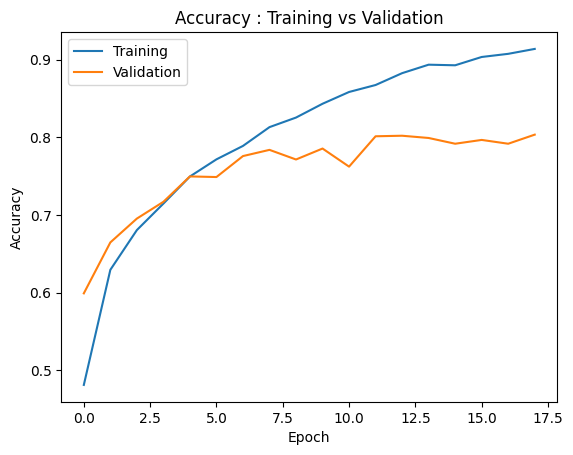

In [ ]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

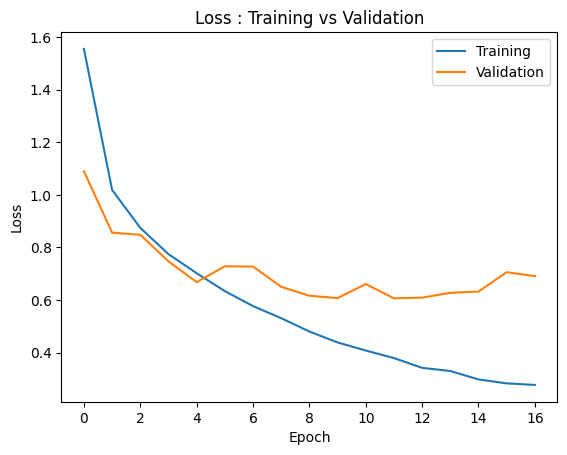

In [ ]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [ ]:
# 원핫 인코딩 해제
train_y = train_y.argmax(axis=1)
test_y = test_y.argmax(axis=1)

In [ ]:
pred_train = model.predict(train_x_ss1)
pred_test = model.predict(test_x_ss1)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y, single_pred_train)
logi_test_accuracy = accuracy_score(test_y, single_pred_test)

print('CNN')
print(f'트레이닝 정확도 : {logi_train_accuracy*100:.2f}%')
print(f'테스트 정확도 : {logi_test_accuracy*100:.2f}%')

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
CNN
트레이닝 정확도 : 94.22%
테스트 정확도 : 79.63%


id = 2434
다음 그림은 Airplane 입니다.
모델의 예측 : Truck
모델의 카테고리별 확률 : 
{'Airplane': 32.0, 'Automobile': 1.0, 'Bird': 0.0, 'Cat': 0.0, 'Deer': 0.0, 'Dog': 0.0, 'Frog': 0.0, 'Horse': 0.0, 'Ship': 0.0, 'Truck': 65.0}
틀렸어요


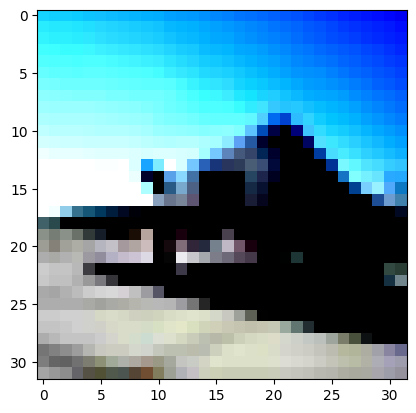

In [ ]:
'''
성능 확인을 위해
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id]]} 입니다.')
print(f'모델의 예측 : {labels[single_pred_test[id]]}')

prob = np.floor(pred_test[id]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob) :
    prob_dict[ labels[idx] ] = prob

print('모델의 카테고리별 확률 : ')
print(prob_dict)

if test_y[id] == single_pred_test[id] :
    print('정답입니다')
else :
    print('틀렸어요')

plt.imshow(test_x[id].reshape([32,32,-1]))
plt.show()

id = 6777
다음 그림은 Bird 입니다.
모델의 예측 : Deer
모델의 카테고리별 확률 : 
{'Airplane': 0.0, 'Automobile': 0.0, 'Bird': 21.0, 'Cat': 0.0, 'Deer': 76.0, 'Dog': 0.0, 'Frog': 0.0, 'Horse': 0.0, 'Ship': 0.0, 'Truck': 0.0}
틀렸어요


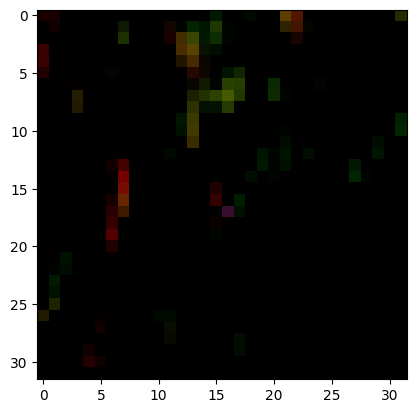

In [ ]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]


print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id]]} 입니다.')
print(f'모델의 예측 : {labels[single_pred_test[id]]}')

prob = np.floor(pred_test[id]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob) :
    prob_dict[ labels[idx] ] = prob

print('모델의 카테고리별 확률 : ')
print(prob_dict)

if test_y[id] == single_pred_test[id] :
    print('정답입니다')
else :
    print('틀렸어요')

plt.imshow(test_x[id].reshape([32,32,-1]))
plt.show()